In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/4525_Final_Project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## movies.csv

In [3]:
movies = pd.read_csv("movies.csv")
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [4]:
def get_genres(data):
  if data == '(no genres listed)':
    return ""

  return data.split("|")

In [5]:
movies['all_genre'] = movies['genres'].apply(get_genres)
movies

,movieId,title,genres,all_genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),Comedy,[Comedy]
...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy,[Comedy]
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy,[Comedy]
27275,131258,The Pirates (2014),Adventure,[Adventure]
27276,131260,Rentun Ruusu (2001),(no genres listed),


In [6]:
all_genres = set()
for genres in movies['all_genre']:
    all_genres.update(genres)
genres = pd.DataFrame()
for genre in all_genres:
    genres[genre] = movies['all_genre'].apply(lambda x: 1 if genre in x else 0)


In [7]:
genres = genres.drop('IMAX', axis=1)
genres

,Drama,War,Horror,Sci-Fi,Documentary,Adventure,Musical,Film-Noir,Mystery,Animation,Action,Comedy,Thriller,Crime,Children,Western,Romance,Fantasy
0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
27274,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
27275,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
27276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'The most popular movie genres')

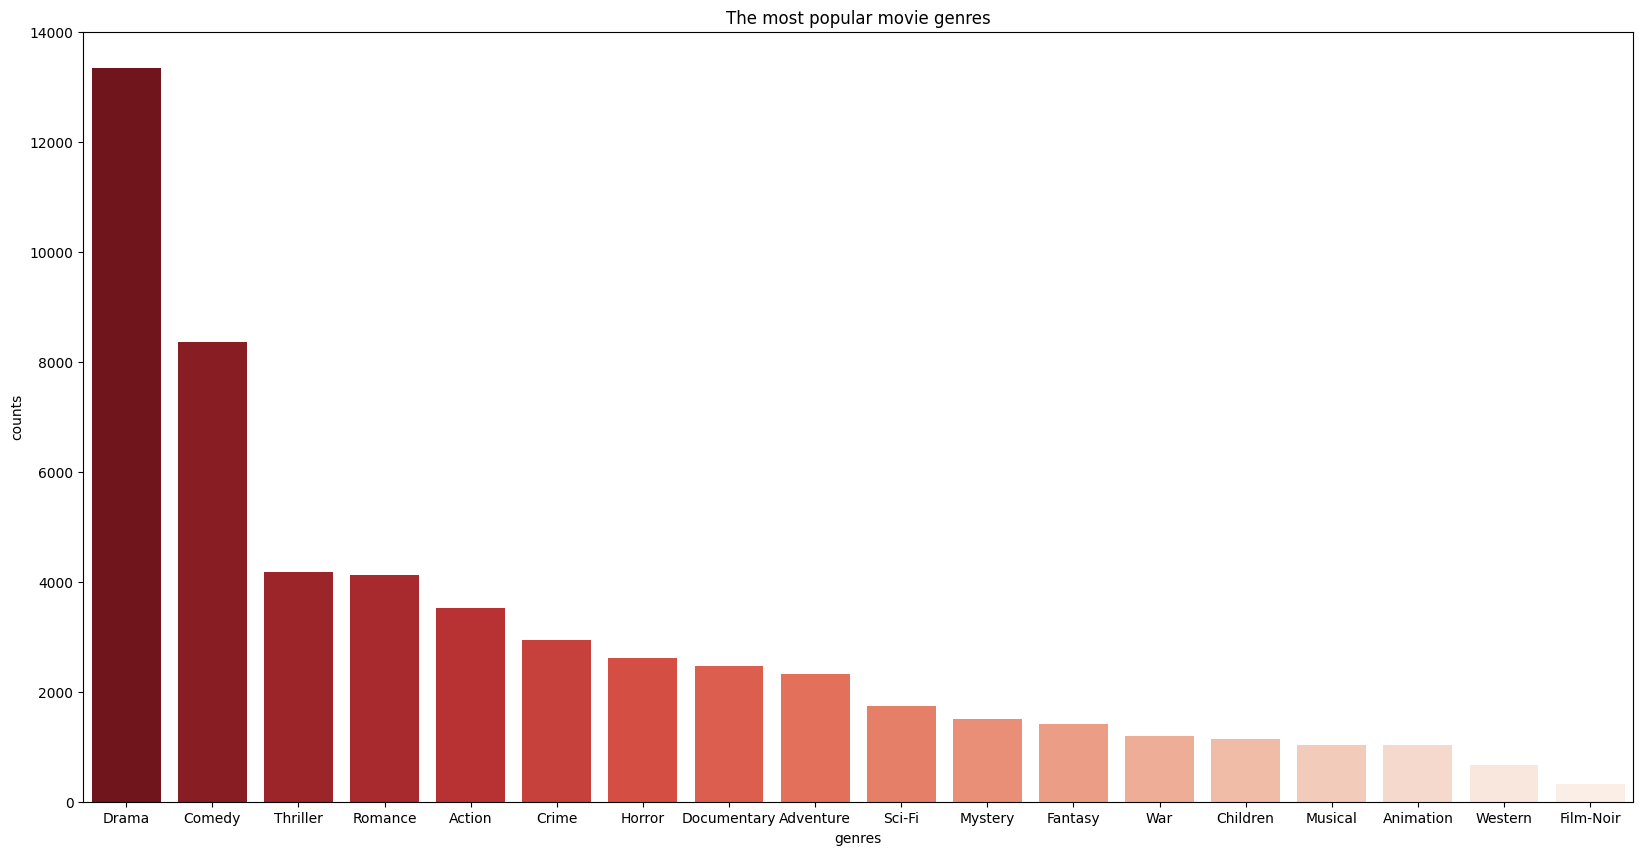

In [8]:
genres_new = genres.sum()
genres_new = genres_new.sort_values(ascending=False)
plt.figure(figsize=(20, 10))
sns.barplot(x=genres_new.index, y=genres_new, palette = "Reds_r")
plt.xlabel('genres')
plt.ylabel('counts')
plt.title('The most popular movie genres')


In [9]:
movies.drop(["all_genre","genres"], axis=1, inplace=True)
movie_genres = pd.concat([movies, genres], axis=1)
movie_genres

,movieId,title,Drama,War,Horror,Sci-Fi,Documentary,Adventure,Musical,Film-Noir,Mystery,Animation,Action,Comedy,Thriller,Crime,Children,Western,Romance,Fantasy
0,1,Toy Story (1995),0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1
1,2,Jumanji (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
2,3,Grumpier Old Men (1995),0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,Waiting to Exhale (1995),1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben (2007),0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
27274,131256,"Feuer, Eis & Dosenbier (2002)",0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
27275,131258,The Pirates (2014),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
27276,131260,Rentun Ruusu (2001),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## tags.csv

In [3]:
tags = pd.read_csv("tags.csv")

In [4]:
tags

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078
...,...,...,...,...
465559,138446,55999,dragged,1358983772
465560,138446,55999,Jason Bateman,1358983778
465561,138446,55999,quirky,1358983778
465562,138446,55999,sad,1358983772


## ratings.csv

In [10]:
ratings = pd.read_csv("ratings.csv")
ratings['time'] = pd.to_datetime(ratings['timestamp'])

In [11]:
ratings['time'] = ratings['time'].dt.normalize()

In [12]:
ratings.drop(["timestamp", "time"], axis=1, inplace=True)

In [20]:
ratings

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
...,...,...,...
20000258,138493,68954,4.5
20000259,138493,69526,4.5
20000260,138493,69644,3.0
20000261,138493,70286,5.0


Text(0.5, 1.0, 'Rating distribution')

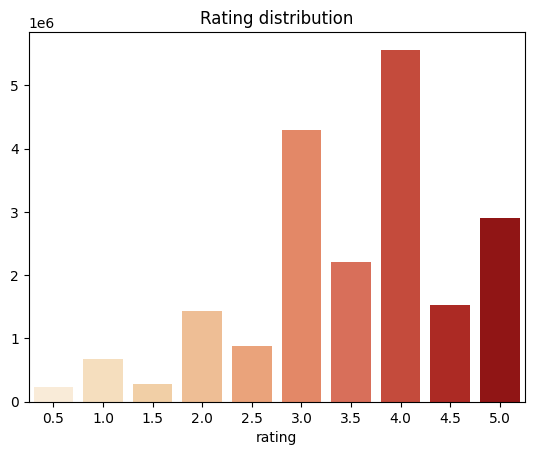

In [13]:
rating_group = ratings.groupby('rating')
sns.barplot(x=rating_group.size().index, y=rating_group.size(), palette = "OrRd");
plt.title('Rating distribution')

In [14]:
movie_rating = ratings.groupby('movieId', as_index=False)['rating'].mean()
movie_avg_rating = pd.merge(movie_rating, movies, how='inner', left_on = 'movieId', right_on = 'movieId')
movie_avg_rating.sort_values('rating', ascending=False)

,movieId,rating,title
19152,95517,5.0,"Barchester Chronicles, The (1982)"
21842,105846,5.0,Only Daughter (2013)
17703,89133,5.0,Boys (Drenge) (1977)
21656,105187,5.0,Linotype: The Film (2012)
21658,105191,5.0,Rocaterrania (2009)
...,...,...,...
26465,129784,0.5,Xuxa in Crystal Moon (1990)
18534,92479,0.5,Kisses for My President (1964)
26475,129834,0.5,Tom and Jerry: The Lost Dragon (2014)
24207,115631,0.5,Alone for Christmas (2013)


In [22]:
count_group = ratings.groupby('movieId', as_index=False)['rating'].sum()
l1 = count_group[count_group > 50].index.values
condition = ratings["movieId"].isin(l1)
columns = ["movieId", "rating"]
filtered = ratings[condition][columns]
movies_filtered = pd.merge(filtered, movies, how='inner', left_on = 'movieId', right_on = 'movieId') 

In [24]:
movies_filtered["production_year"] = movies_filtered["title"].str[-5:-1]
movies_filtered["movie_title"] = movies_filtered["title"].str[:-7]
movies_filtered.drop("title", axis=1, inplace=True)
movies_filtered

,movieId,rating,production_year,movie_title
0,2,3.5,1995,Jumanji
1,2,3.0,1995,Jumanji
2,2,3.0,1995,Jumanji
3,2,3.0,1995,Jumanji
4,2,3.0,1995,Jumanji
...,...,...,...,...
17709549,26304,2.0,1973,"Spook Who Sat by the Door, The"
17709550,26337,3.5,1975,"Adventures of the Wilderness Family, The"
17709551,26337,3.0,1975,"Adventures of the Wilderness Family, The"
17709552,26397,3.0,1978,Brass Target


In [28]:
movies_filtered['production_year'].unique()

array(['1995', '1994', '1977', '1993', '1982', '1991', '1996', '1939',
       '1968', '1975', '1988', '1979', '1992', '1986', '1980', '1981',
       '1966', '1985', '1960', '1987', '1984', '1990', '1989', '1963',
       '1974', '1969', '1922', '1976', '1997', '1998', '1973', '1983',
       '1978', '1999', '1931', '1956', '1967', '1964', '1961', '1970',
       '1958', '2000', '1933', '2001', '2002', '2003', '2004', '1945',
       '1932', '1972', '1959', '1948', '1954', '1934', '1946', '1971',
       '1955', '1942', '1953', '1962', '1937', '1940', '1965', '1952',
       '1950', '1957', '1951', '1936', '1941', '1938', '1944', '1927',
       '1947', '1925', '1921', '1935', '1949', '1943', '1930', '1926',
       '1928', '1920', '1919', '1929', '1915', '1923', '1924', '1916',
       '1917', '1918', '1914', '948)', '965)', '988)'], dtype=object)

In [30]:
condition = (movies_filtered['production_year'] != '948)') & (movies_filtered['production_year'] != '965)') & (movies_filtered['production_year'] != '988)')
movies_filtered = movies_filtered[condition]

In [26]:
# top 10 rated movies with more than 10 ratings
df = movies_filtered.groupby('movieId', as_index=False)['rating'].mean().sort_values('rating', ascending=False)
df_merged = pd.merge(df, movies, how='inner', left_on = 'movieId', right_on = 'movieId')
df_merged[:10]

,movieId,rating,title
0,26718,5.000000,Life On A String (Bian chang Bian Zou) (1991)
1,3226,4.666667,Hellhounds on My Trail (1999)
2,318,4.446990,"Shawshank Redemption, The (1994)"
3,26519,4.375000,Next of Kin (1984)
4,858,4.364732,"Godfather, The (1972)"
5,50,4.334372,"Usual Suspects, The (1995)"
6,7568,4.333333,Love Life (2001)
7,527,4.310175,Schindler's List (1993)
8,1221,4.275641,"Godfather: Part II, The (1974)"
9,2019,4.274180,Seven Samurai (Shichinin no samurai) (1954)


In [31]:
movies_filtered["decade"] = movies_filtered['production_year'].astype(int)//10*10

<ipython-input-31-d20798924d76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_filtered["decade"] = movies_filtered['production_year'].astype(int)//10*10


In [32]:
movies_filtered

,movieId,rating,production_year,movie_title,decade
0,2,3.5,1995,Jumanji,1990
1,2,3.0,1995,Jumanji,1990
2,2,3.0,1995,Jumanji,1990
3,2,3.0,1995,Jumanji,1990
4,2,3.0,1995,Jumanji,1990
...,...,...,...,...,...
17709549,26304,2.0,1973,"Spook Who Sat by the Door, The",1970
17709550,26337,3.5,1975,"Adventures of the Wilderness Family, The",1970
17709551,26337,3.0,1975,"Adventures of the Wilderness Family, The",1970
17709552,26397,3.0,1978,Brass Target,1970


In [33]:
top_rate_by_decade = (movies_filtered
                     .groupby(["decade", "movie_title"])
                     .mean()
                     .sort_values(["decade", "rating"],
                                                ascending=False)
                     .groupby(level=0, as_index=False)
                     .apply(lambda x: x.head() if len(x) >= 5 else x.head(1))
                     .reset_index(level=0, drop=True)
                    ).round(2)

top_rate_by_decade

movieId  rating
decade movie_title                                                        
1910   Intolerance: Love's Struggle Throughout the Ages     7243.0    3.72
       Immigrant, The                                       8511.0    3.70
       Dog's Life, A                                        3309.0    3.61
       Broken Blossoms or The Yellow Man and the Girl       6988.0    3.60
       Cheat, The                                          25735.0    3.56
1920   General, The                                         3022.0    4.16
       Gold Rush, The                                       3629.0    4.09
       Sunrise: A Song of Two Humans                        8125.0    4.04
       Passion of Joan of Arc, The (Passion de Jeanne ...   6985.0    4.04
       Metropolis                                           2010.0    3.99
1930   M                                                    1260.0    4.19
       Thin Man, The                                         950.0    4.18
       City Lights                                          3307.0    4.17
       It Happened One Night                                 905.0    4.17
       Grand Illusion (La grande illusion)                  3134.0    4.15
1940   Casablanca                                            912.0    4.26
       Third Man, The                                       1212.0    4.25
       Double Indemnity                                     3435.0    4.22
       Big Sleep, The                                       1284.0    4.21
       Notorious                                             930.0    4.20
1950   Seven Samurai (Shichinin no samurai)                 2019.0    4.27
       Rear Window                                           904.0    4.27
       Sunset Blvd. (a.k.a. Sunset Boulevard)                922.0    4.26
       North by Northwest                                    908.0    4.23
       Paths of Glory                                       1178.0    4.23
1960   Dr. Strangelove or: How I Learned to Stop Worry...    750.0    4.25
       Yojimbo                                              3030.0    4.21
       To Kill a Mockingbird                                1207.0    4.19
       Lawrence of Arabia                                   1204.0    4.16
       Great Escape, The                                    1262.0    4.14
1970   Godfather, The                                        858.0    4.36
       Godfather: Part II, The                              1221.0    4.28
       Rejs                                                26232.0    4.25
       Rockers                                             26433.0    4.25
       One Flew Over the Cuckoo's Nest                      1193.0    4.25
1980   Demon Lover Diary                                    7823.0    4.25
       Raiders of the Lost Ark (Indiana Jones and the ...   1198.0    4.22
       Star Wars: Episode V - The Empire Strikes Back       1196.0    4.19
       Princess Bride, The                                  1197.0    4.18
       Decalogue, The (Dekalog)                            26587.0    4.17
1990   Life On A String (Bian chang Bian Zou)              26718.0    5.00
       Hellhounds on My Trail                               3226.0    4.67
       Shawshank Redemption, The                             318.0    4.45
       Usual Suspects, The                                    50.0    4.33
       Schindler's List                                      527.0    4.31
2000   Love Life                                            7568.0    4.33
       Band of Brothers                                     7502.0    4.26
       City of God (Cidade de Deus)                         6016.0    4.24
       Spirited Away (Sen to Chihiro no kamikakushi)        5618.0    4.20
       Amelie (Fabuleux destin d'Amélie Poulain, Le)        4973.0    4.20

In [13]:
tidy_movie_ratings = pd.merge(ratings, movie_genres, how='inner', left_on = 'movieId', right_on = 'movieId')
                       

In [14]:
tidy_movie_ratings.head()

,userId,movieId,rating,title,War,Film-Noir,Fantasy,Children,Musical,Mystery,...,Animation,Western,Horror,Crime,Adventure,Action,Documentary,Comedy,Drama,Thriller
0,1,2,3.5,Jumanji (1995),0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5,2,3.0,Jumanji (1995),0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,13,2,3.0,Jumanji (1995),0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,29,2,3.0,Jumanji (1995),0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,34,2,3.0,Jumanji (1995),0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [15]:
tidy_movie_ratings["production_year"] = tidy_movie_ratings["title"].str[-5:-1]
tidy_movie_ratings["movie_title"] = tidy_movie_ratings["title"].str[:-7]
tidy_movie_ratings.drop("title", axis=1, inplace=True)

In [16]:
tidy_movie_ratings.head()

,userId,movieId,rating,War,Film-Noir,Fantasy,Children,Musical,Mystery,Romance,...,Horror,Crime,Adventure,Action,Documentary,Comedy,Drama,Thriller,production_year,movie_title
0,1,2,3.5,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1995,Jumanji
1,5,2,3.0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1995,Jumanji
2,13,2,3.0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1995,Jumanji
3,29,2,3.0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1995,Jumanji
4,34,2,3.0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1995,Jumanji


In [ ]:
prodcount = (tidy_movie_ratings[["production_year", "movie_title"]]
             .groupby("production_year")
             .count()
            )

prodcount.tail()